In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/IRIS.csv')
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sepal_length             150 non-null    float64
 1   sepal_width              150 non-null    float64
 2   petal_length             150 non-null    float64
 3   petal_width              150 non-null    float64
 4   species_Iris-setosa      150 non-null    bool   
 5   species_Iris-versicolor  150 non-null    bool   
 6   species_Iris-virginica   150 non-null    bool   
dtypes: bool(3), float64(4)
memory usage: 5.3 KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df=pd.get_dummies(df[df.columns])

In [ ]:
x=df.iloc[:,:4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y=df.iloc[:,4]
y

,species_Iris-setosa
0,True
1,True
2,True
3,True
4,True
...,...
145,False
146,False
147,False
148,False


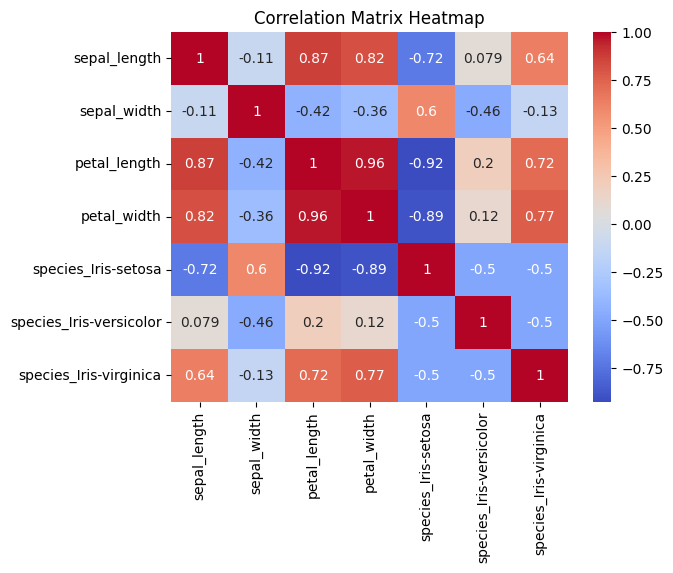

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

<Axes: >

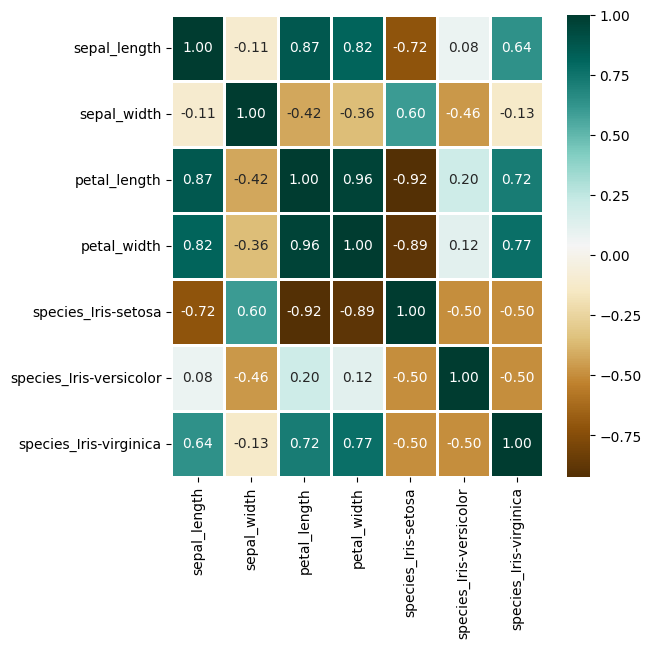

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),cmap='BrBG',
            annot=True,fmt='.2f',
            linewidths=1)

In [ ]:
x__train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
model=LogisticRegression()
model.fit(x__train,y_train)

LogisticRegression()

In [ ]:
predict=model.predict(x_test)

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,predict))

Confusion Matrix:
[[22  0]
 [ 0  8]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, predict))

Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        22
        True       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
accuracy_score(y_test,predict)

1.0